In [ ]:
!pip install graphviz


In [8]:
dataset = [(10, 10), (11,10), (12,10), (13, 10), (14, 13), (15, 20), (17.5, 35), (18, 44), (18.5, 52), (19, 55), (21, 80), (22, 83), (23, 80), (24, 83), (25, 85), (28, 100), (29, 100), (30, 100), (31, 100), (31, 100)]

import matplotlib.pyplot as plt
import numpy as np
import graphviz

xpoints = np.array([x[0] for x in dataset])
ypoints = np.array([x[1] for x in dataset])

#plt.plot(xpoints, ypoints, 'o')
#plt.show()


def find_split(dataset):
    rss = []
    n = len(dataset)
    for split_index in range(1, n - 1):
        mean1 = 0
        for i in range(split_index):
            mean1 += dataset[i][1]
        mean1 = mean1 / split_index
        mean2 = 0
        for i in range(split_index, n):
            mean2 += dataset[i][1]
        mean2 = mean2 / (n - split_index)
        sse = 0
        for i in range(split_index):
            sse += (dataset[i][1] - mean1) ** 2
        for i in range(split_index, n):
            sse += (dataset[i][1] - mean2) ** 2
        rss.append((sse, split_index))
    print("RSS and the index are ", rss)
    rss.sort()
    print("We split at index ", rss[0][1])
    return rss[0][1]


class Node:
    def __init__(self, dataset):
        self.dataset = dataset #this will be a 2d array
        self.left = None
        self.right = None
        self.pred = None
        self.cond = None #left strictly less than this

def make_tree(dataset):
    root = Node(dataset)
    if len(dataset) <= 3:
        total = sum([(x[1]) for x in dataset])
        mean = total / len(dataset)
        root.pred = mean
        return root
    indx = find_split(dataset)
    root.cond = dataset[indx][0]
    root.left = make_tree(dataset[:indx])
    root.right = make_tree(dataset[indx:])
    return root


def inorder(root):
    if root is None:
        return []
    if root.cond is None:
        inorder_arr = ["This is a leaf node. Prediction is ", root.pred]
    else:
        inorder_arr = ["This is an internal node. Go to left is attribute is less than ", root.cond, " else go to right subtree"]
    return inorder(root.left) + inorder_arr + inorder(root.right)

def postorder(root):
    if root is None:
        return []
    if root.cond is None:
        inorder_arr = ["This is a leaf node. Prediction is ", root.pred]
    else:
        inorder_arr = ["This is an internal node. Go to left is attribute is less than ", root.cond, " else go to right subtree"]
    return inorder(root.left) +  inorder(root.right) + inorder_arr





graph = make_tree(dataset)

import graphviz

def visualize_binary_tree(root):
    dot = graphviz.Digraph()

    def add_nodes_edges(node):
        if node.cond is None:
            val = str(node.pred)
            dot.node(val)
        else:
            val = "left is less than " + str(node.cond)
            dot.node(val)

        if node.left:
            if node.left.cond is None:
                val_left = str(node.left.pred)
                dot.node(val_left)
            else:
                val_left = "left is less than " + str(node.left.cond)
                dot.node(val_left)

            dot.edge(val, val_left)
            add_nodes_edges(node.left)

        if node.right:
            if node.right.cond is None:
                val_right = str(node.right.pred)
                dot.node(val_right)
            else:
                val_right = "left is less than " + str(node.right.cond)
                dot.node(val_right)

            dot.edge(val, val_right)
            add_nodes_edges(node.right)

    add_nodes_edges(root)
    dot.render('binary_tree', view=True, format='png')

visualize_binary_tree(graph)

RSS and the index are  [(22740.947368421057, 1), (19989.77777777778, 2), (16914.941176470584, 3), (13455.75, 4), (9920.933333333334, 5), (6816.047619047619, 6), (5238.483516483517, 7), (4413.666666666667, 8), (4205.636363636365, 9), (3961.8, 10), (6485.636363636367, 11), (8883.666666666666, 12), (10530.79120879121, 13), (12179.857142857145, 14), (13735.333333333332, 15), (16605.75, 16), (19138.470588235294, 17), (21389.77777777778, 18)]
We split at index  10
RSS and the index are  [(2870.0, 1), (2518.875, 2), (2067.4285714285716, 3), (1465.5, 4), (810.0, 5), (321.83333333333337, 6), (592.3809523809523, 7), (1246.5, 8)]
We split at index  6
RSS and the index are  [(75.2, 1), (66.75, 2), (52.66666666666667, 3), (24.5, 4)]
We split at index  4
RSS and the index are  [(0.0, 1), (0.0, 2)]
We split at index  1
RSS and the index are  [(64.66666666666667, 1), (45.0, 2)]
We split at index  2
RSS and the index are  [(673.9999999999999, 1), (580.5, 2), (373.71428571428567, 3), (196.5, 4), (18.799

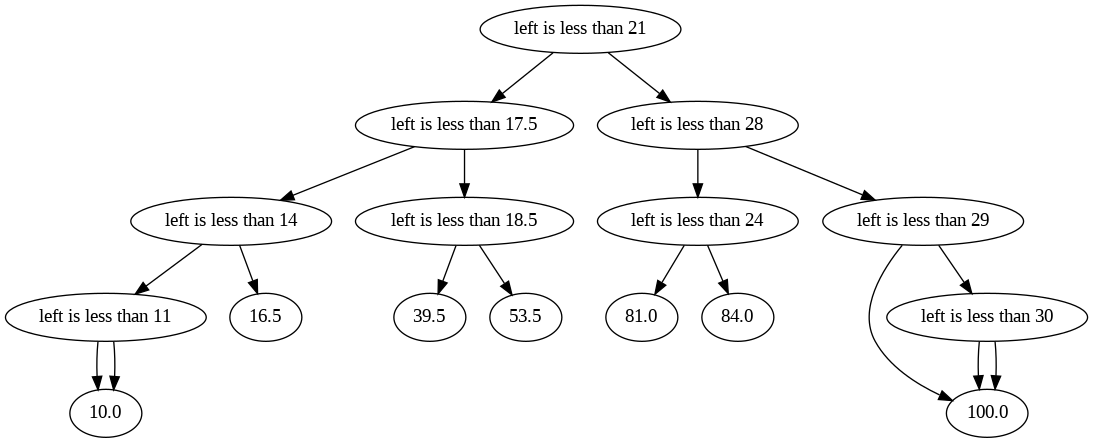

In [7]:
from IPython.display import Image

fname = "binary_tree.png"
Image(fname)